<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 6>Assignment: Exploring and Preparing Data</font></h1>

Estimated time needed: **70** minutes

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

<h2 id = 'Objective'>Objectives</h2>

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

<h2 id = 'lib'>Import libraries and Aux functions</h2>

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [2]:
# We import the data made by the author
df = pd.read_csv('datasets/dataset_part_2.csv')

# Import the dataframe made by the course 
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
dfr = pd.read_csv(URL)

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


<Figure size 640x480 with 0 Axes>

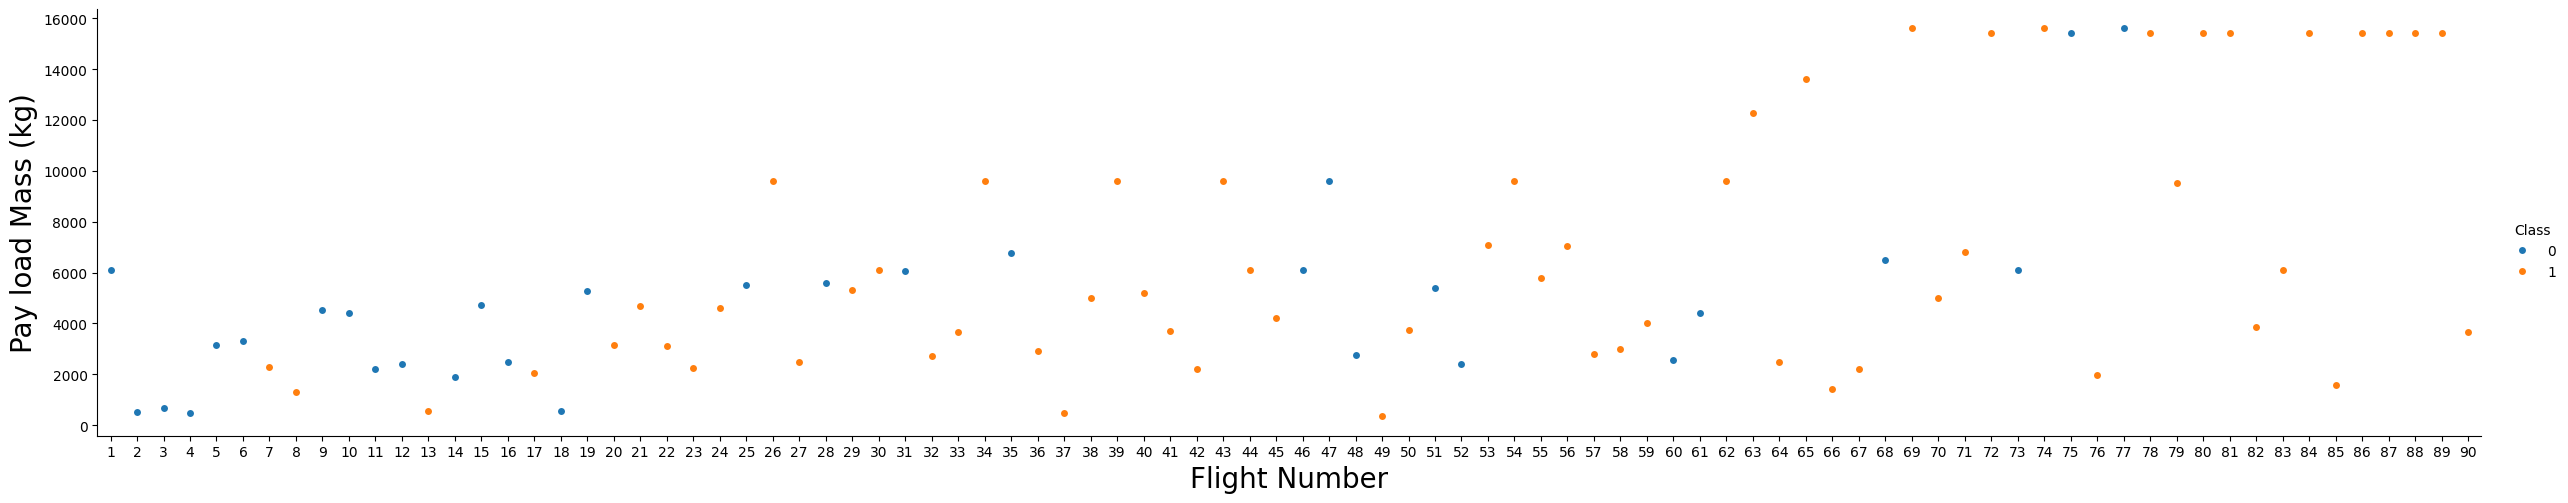

In [7]:
plt.figure()
sns.catplot(data=dfr,y="PayloadMass", x="FlightNumber", hue="Class", aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

<h3 id = 'Task1'>Task 1: Visualize the relationship between Flight Number and Launch Site</h3>

<Figure size 640x480 with 0 Axes>

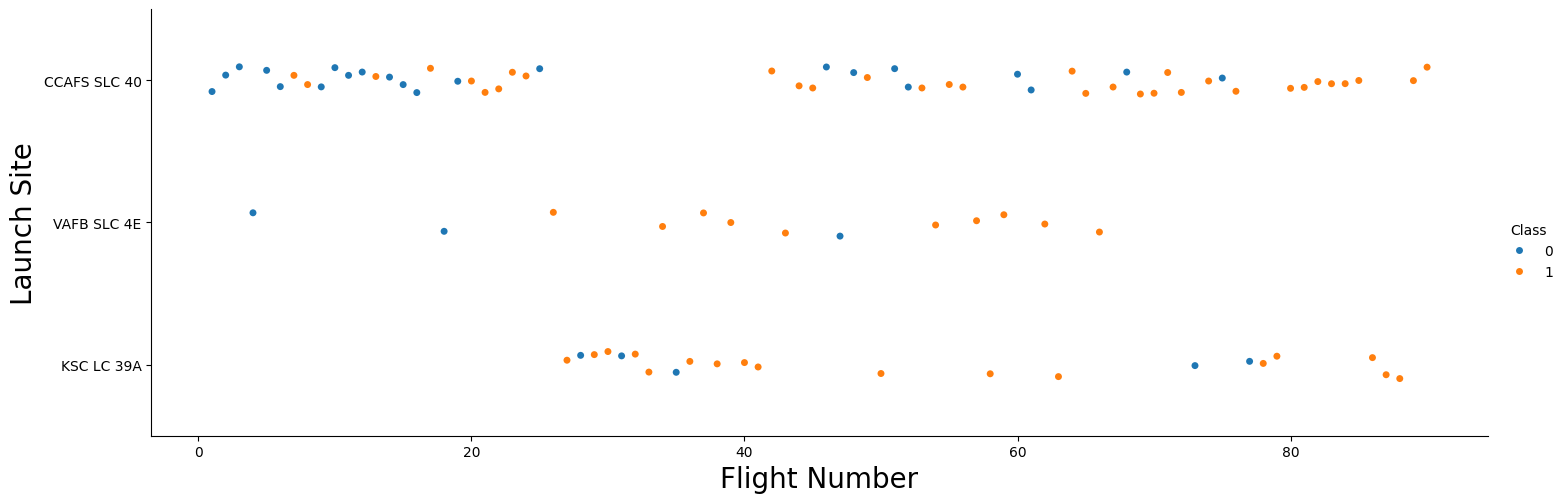

In [36]:
# Since the LaunchSite is categorical value we should do a categorical plot

plt.figure()
sns.catplot(data = dfr, x = 'FlightNumber', y = 'LaunchSite', hue = 'Class',aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

It can be seen that the <code>Launch Site</code> and the <code>Flight Number</code> doesn't have a linear relationship or either relationship because of the categorical value of <code>Launch Site</code>. Going a little further we can see that in proportion the site <b>CCAFS SLC 40</b> has least success rate than the other two sites, because of the quantity of <code>Class : 0</code>, but it has more tries in launches than the others.

<h3 id = 'task2'>Task 2: Visualize the relationship between Payload and Launch Site</h3>

We also want to observe if there is any relationship between launch sites and their payload mass.

<Figure size 640x480 with 0 Axes>

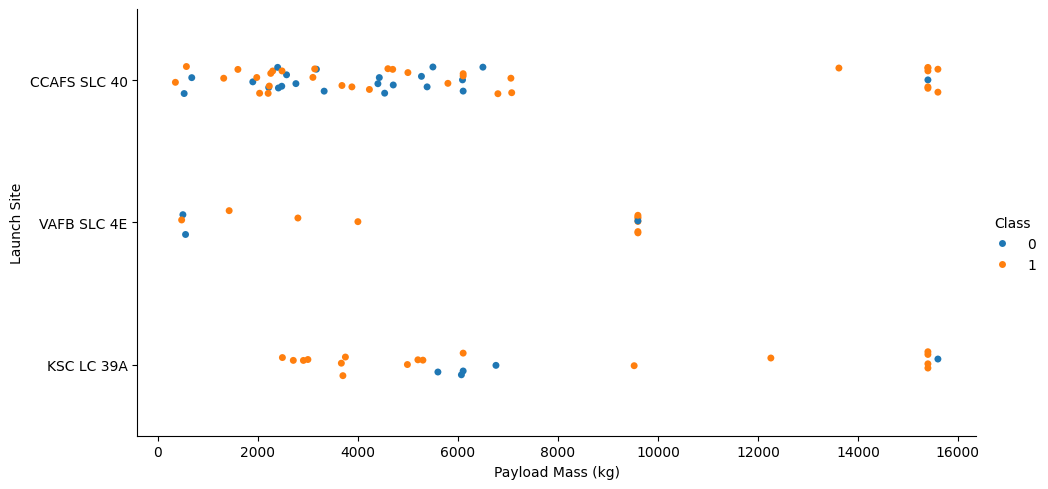

In [9]:
plt.figure()
sns.catplot(data = dfr, x = 'PayloadMass', y = 'LaunchSite', hue = 'Class',aspect = 2)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launch site there are no  rockets  launched for  heavy payload mass (greater than 10000).


<h3 id = 'task3'>Task 3: Visualize the relationship between success rate of each orbit type</h3>

Next, we want to visually check if there are any relationship between success rate and orbit type.
Let's create a `bar chart` for the success rate of each orbit


In [10]:
df_orbit = dfr.groupby('Orbit')['Class'].mean()
df_orbit

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

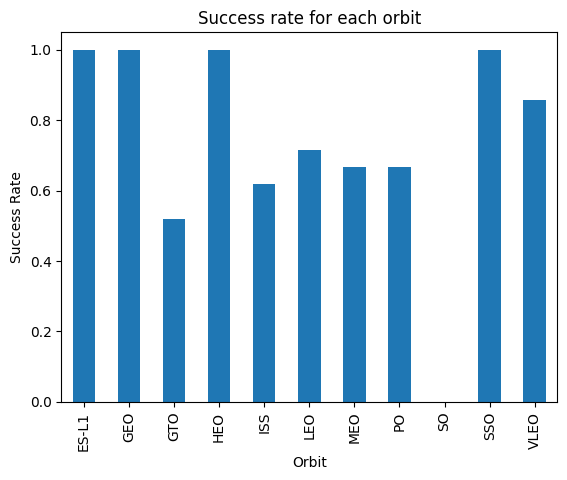

In [11]:
df_orbit.plot(kind = 'bar', x = 'Orbit',
              xlabel= 'Orbit', ylabel = 'Success Rate',
              title = 'Success rate for each orbit')
plt.show()

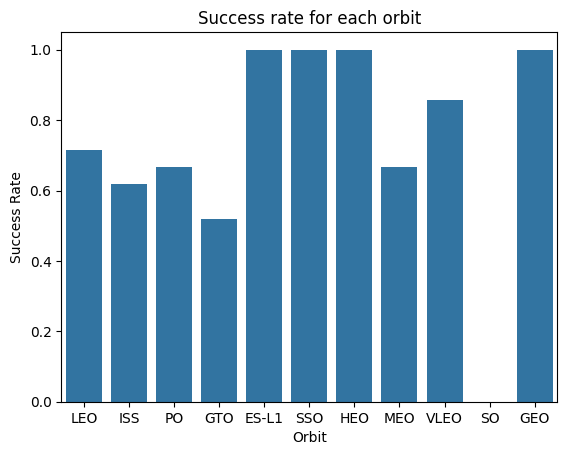

In [12]:
# With seaborn without grouping
sns.barplot(dfr, x ='Orbit', y = 'Class', errorbar = None)
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.title('Success rate for each orbit')
plt.show()

<h3 id = task4>Task 4: Visualize the relationship between FlightNumber and Orbit type</h3>

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

<Figure size 640x480 with 0 Axes>

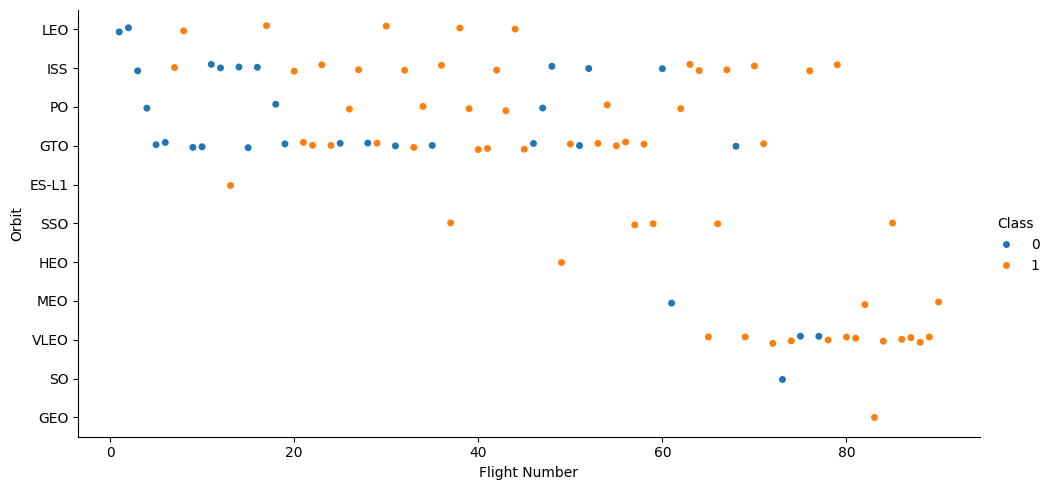

In [13]:
plt.figure()
sns.catplot(dfr, x = 'FlightNumber', y = 'Orbit', hue = 'Class', aspect= 2)
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

Also, it can be seen that in proportion the <b>VLEO</b> orbit has a greater success rate than the other launches in other orbits. Also <b>SSO</b> has 100% success rate considering all flight numbers from $ \sim 39$

<h3 id = task5>Task 5: Visualize the relationship between Payload and Orbit type</h3>

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

<Figure size 640x480 with 0 Axes>

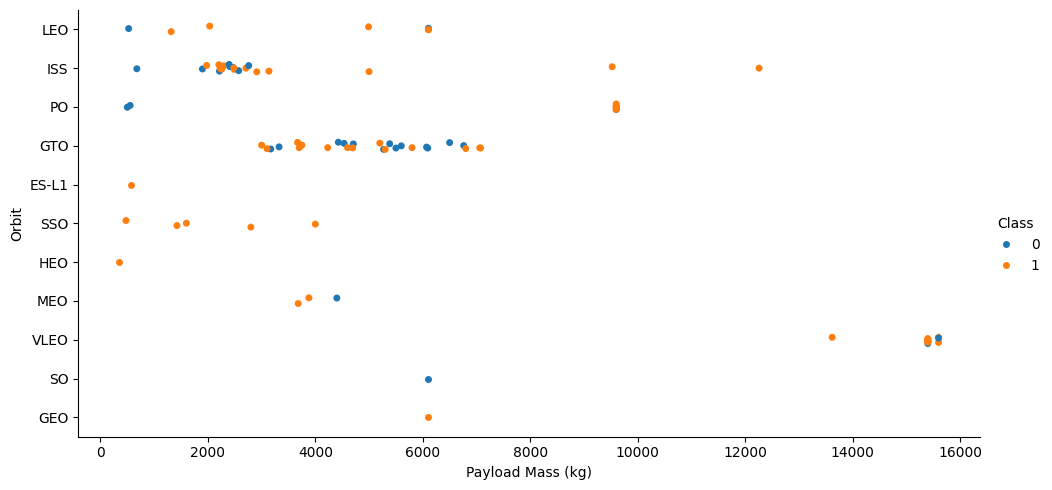

In [14]:
plt.figure()
sns.catplot(dfr, x = 'PayloadMass', y = 'Orbit', hue = 'Class', aspect = 2)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing (unsuccessful mission) are both there here.

Also <code>VLEO</code>, with higher mass of payload the greater the chance of success.

<h3 id = Task6>Task 6: Visualize the launch success yearly trend</h3>

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

First we make a function to get the year of each reading.

In [15]:
def get_year(data:pd.DataFrame) -> pd.Series:
    year = []
    for measure in data['Date']:
        year.append(measure.split('-')[0])
    return pd.Series(year)

dfr['Date'] = get_year(dfr)

dfr.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Plot a line chart with x axis to be the extracted year and y axis to be the success rate

In [16]:
dfr.groupby('Date')['Class'].mean()

Date
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64

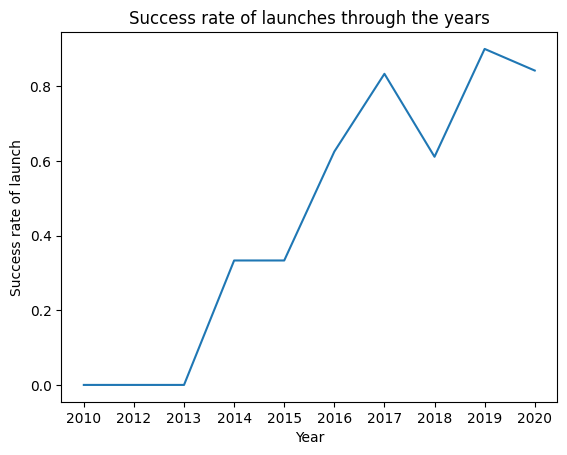

In [17]:
plt.figure()
sns.lineplot(dfr,x ='Date', y = 'Class', errorbar = None)
plt.xlabel('Year')
plt.ylabel('Success rate of launch')
plt.title('Success rate of launches through the years')
plt.show()

<h3 id = Features>Features Engineering</h3>

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [33]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [31]:
features_one_hot = pd.get_dummies(features[['Orbit','LaunchSite','LandingPad','Serial']])
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3 id = task8> Task 8: Cast all numeric columns to <code>float64</code></h3>

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>

In [32]:
features_one_hot = features_one_hot.astype('float64')

features_one_hot

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>

In [34]:
features_one_hot.to_csv('datasets/dataset_part_3.csv', index=False)